# Запуск сторонних функций

In [1]:
%run utils/read_data.py
%run utils/shuffle_data.py
%run utils/split_data.py
%run utils/map_feature
%run utils/cost_function_reg
%run utils/reg_analysis
%run utils/predict
%run utils/plot_decision_model

# Инициализация данных

### Переменные

In [2]:
num_features = 28
lambda_ = 0.5

### Текстовый файл

In [3]:
data = read_data('data/ex2data2.txt')

# Обработка данных

In [4]:
# Перемешивание данных
shuffled_data = shuffle_data(data)
# Размеры данных
m_all = data.shape[0]
# Разделение на обучающую и тестовую выборки
X_train, y_train, X_test, y_test = split_data(shuffled_data)
# Размеры выборок
m_training = X_train.shape[0]
m_test = X_test.shape[0]

# Анализ зависимостей

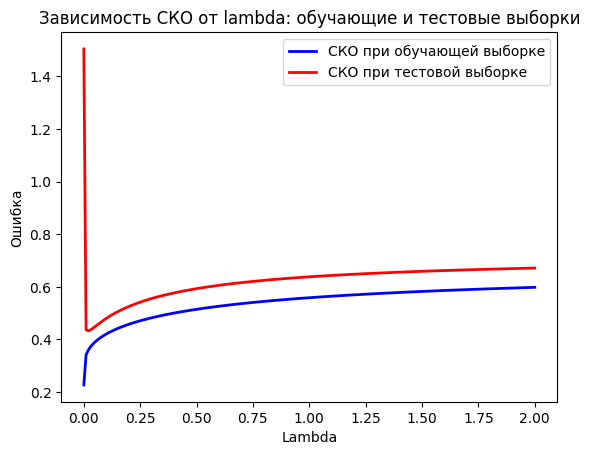

СКО при lambda 0.00: Train = 0.226298, Test = 1.504410
СКО при lambda 0.01: Train = 0.340767, Test = 0.435907
СКО при lambda 0.02: Train = 0.358918, Test = 0.431960
СКО при lambda 0.03: Train = 0.371514, Test = 0.435682
СКО при lambda 0.04: Train = 0.381491, Test = 0.441574
СКО при lambda 0.05: Train = 0.389892, Test = 0.448135
СКО при lambda 0.06: Train = 0.397221, Test = 0.454796
СКО при lambda 0.07: Train = 0.403760, Test = 0.461380
СКО при lambda 0.08: Train = 0.409687, Test = 0.467731
СКО при lambda 0.09: Train = 0.415122, Test = 0.473805
СКО при lambda 0.10: Train = 0.420150, Test = 0.479607
СКО при lambda 0.11: Train = 0.424835, Test = 0.485143
СКО при lambda 0.12: Train = 0.429226, Test = 0.490406
СКО при lambda 0.13: Train = 0.433359, Test = 0.495424
СКО при lambda 0.14: Train = 0.437266, Test = 0.500209
СКО при lambda 0.15: Train = 0.440972, Test = 0.504777
СКО при lambda 0.16: Train = 0.444497, Test = 0.509146
СКО при lambda 0.17: Train = 0.447858, Test = 0.513322
СКО при la

In [5]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

X_train = map_feature(X_train[:, 0], X_train[:, 1], num_features)
X_test = map_feature(X_test[:, 0], X_test[:, 1], num_features)

initial_theta = np.zeros(X_train.shape[1])

res = minimize(fun=cost_function_reg,
               x0=initial_theta,
               args=(X_train, y_train, lambda_),
               method='BFGS',
               jac=True,
               options={'maxiter': 400})

theta = res.x

lambda_values, J_train, J_test = reg_analysis(X_train, y_train, X_test, y_test)

plt.figure()
plt.plot(lambda_values, J_train, '-b', linewidth=2, markersize=8, label='СКО при обучающей выборке')
plt.plot(lambda_values, J_test, '-r', linewidth=2, markersize=8, label='СКО при тестовой выборке')
plt.title('Зависимость СКО от lambda: обучающие и тестовые выборки')
plt.xlabel('Lambda')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

for i, lambda_ in enumerate(lambda_values):
    print(f"СКО при lambda {lambda_:.2f}: Train = {J_train[i]:.6f}, Test = {J_test[i]:.6f}")

# Сохранение модели

In [6]:
import joblib

joblib.dump(theta, 'models/logistic_regression_model.pkl')

['models/logistic_regression_model.pkl']

# Точность обучения

In [7]:
print(f'Модель с {num_features} признаками и lambda = {lambda_}:')

p_train = predict(theta, X_train)
print(f'Точность обучения (train): {np.mean(p_train == y_train) * 100:.2f}%')

p_test = predict(theta, X_test)
print(f'Точность обучения (test): {np.mean(p_test == y_test) * 100:.2f}%')

Модель с 28 признаками и lambda = 2.0:
Точность обучения (train): 78.31%
Точность обучения (test): 82.86%


# Анализ обученной модели

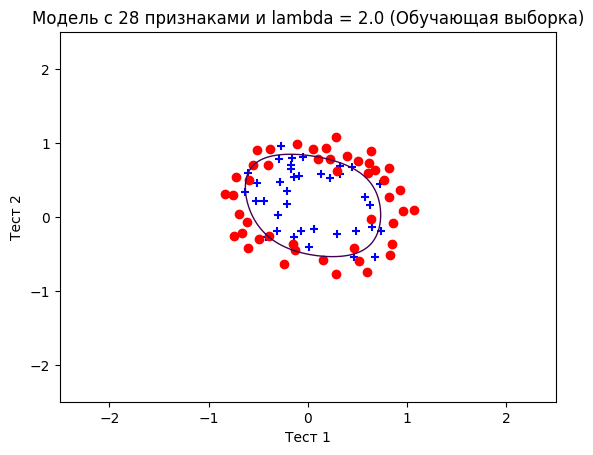

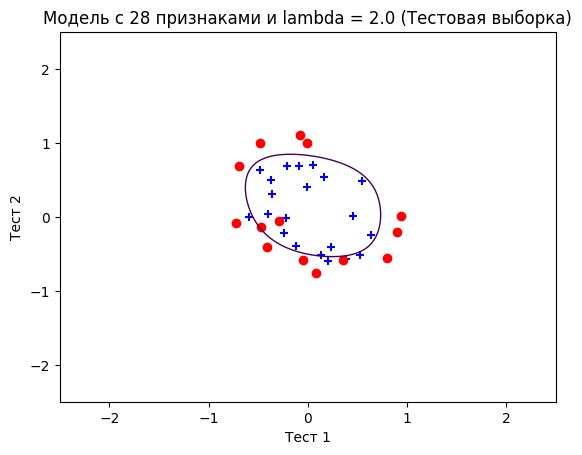

In [8]:
from matplotlib import pyplot as plt

plt.figure()
plot_decision_model(theta, X_train, y_train, X_train.shape[1])
plt.title(f'Модель с {num_features} признаками и lambda = {lambda_} (Обучающая выборка)')
plt.show()

plt.figure()
plot_decision_model(theta, X_test, y_test, X_test.shape[1])
plt.title(f'Модель с {num_features} признаками и lambda = {lambda_} (Тестовая выборка)')
plt.show()